In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml

In [2]:
mnist=fetch_openml("mnist_784") #https://www.openml.org/d/554
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [9]:
mnist_data=pd.DataFrame(mnist.data)

In [3]:
x=mnist['data']
y=mnist['target']

print(x.shape)
print(y.shape)

(70000, 784)
(70000,)


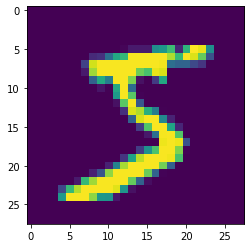

In [4]:
digit=x[0]
digit_image=digit.reshape(28,28)
plt.imshow(digit_image)
plt.show()

In [5]:
x_train,x_test,y_train,y_test=x[:60000],x[60000:],y[:60000],y[60000:]
len(x_train)

60000

# Decision Tree Classifier Algorithm

In [31]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [33]:
model.score(x_test,y_test)

0.8788

In [13]:
model.predict([x[10000]])

array(['3'], dtype=object)

In [ ]:
y[10000]

# SGD Classifier Algorithm

In [30]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

from sklearn.linear_model import SGDClassifier

model_sgd=SGDClassifier()
model_sgd.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
model_sgd.score(x_test,y_test)

NameError: name 'model_sgd' is not defined

In [37]:
index=12300
model_sgd.predict([X[index]])

array(['3'], dtype='<U1')

In [38]:
y[index]

'3'

# KNeighbours Classifier Algorithm

In [8]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

from sklearn.neighbors import KNeighborsClassifier

model_knn=KNeighborsClassifier()
model_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
model_knn.score(X_test,y_test)

In [ ]:
i=4555
model_knn.predict([X[i]])

In [ ]:
y[i]

# Random Forest Classifier Algorithm

In [11]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

from sklearn.ensemble import RandomForestClassifier

model_rf=RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
model_rf.score(X_test,y_test)

0.9694

In [20]:
i=34430
model_rf.predict([X[i]])

array(['4'], dtype=object)

In [21]:
y[i]

'4'

# CNN

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Flatten,MaxPool2D,Conv2D
import numpy as np

model_cnn = Sequential([
    Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'),    
    Conv2D(64,(3,3),activation='relu'),
    MaxPool2D((2,2)),
    Dense(128,  activation='relu'),       
    Flatten(),
    Dense(10, activation='softmax')
])



In [7]:
model_cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# prepare data for CNN
from tensorflow.keras.utils import to_categorical

xx_train=x_train.reshape(-1,28,28,1)
xx_test=x_test.reshape(-1,28,28,1)

xx_train=xx_train/255.0
xx_test=xx_test/255.0

yy_train=to_categorical(y_train,10)
yy_test=to_categorical(y_test,10)

print(xx_train.shape)
print(xx_test.shape)
print(yy_train.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)


In [14]:
model_cnn.fit(xx_train, yy_train, epochs=3,batch_size=128,verbose=1)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 153s 3ms/sample - loss: 0.0271 - accuracy: 0.9915
Epoch 2/3
60000/60000 [==============================] - 162s 3ms/sample - loss: 0.0209 - accuracy: 0.9936
Epoch 3/3
60000/60000 [==============================] - 153s 3ms/sample - loss: 0.0185 - accuracy: 0.9940


In [15]:
model_cnn.evaluate(xx_test,yy_test)

10000/10000 [==============================] - 10s 1ms/sample - loss: 0.0362 - accuracy: 0.9883


[0.036227555527619554, 0.9883]

In [16]:
p=model_cnn.predict(xx_test[0].reshape(-1,28,28,1))
print(np.argmax(p[0]))
print(y_test[0])




7
7


In [17]:
# save the model
model_cnn.save('handwriting_98_03.h5')

In [18]:
from tensorflow.keras.models import load_model
model_cnn=load_model('handwriting_98_03.h5')
p=model_cnn.predict(xx_test[0].reshape(-1,28,28,1))
print(np.argmax(p))
print(y_test[0])
# xx_test[0].shape

7
7


In [19]:
import tensorflow as tf
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model_cnn)
tflite_model = converter.convert()
open('handwriting_98_03.tflite','wb').write(tflite_model)

848404

In [20]:
c,w=0,0

for i in range(100):    
    img=np.expand_dims(xx_test[i],axis=0)
    p=model_cnn.predict(img)
    pred=np.argmax(p[0])
    real=int(y_test[i])
    if(pred==real):
        c+=1
    else:
        w+=1
        print(i)


print("C %d W %d"%(c,w))
    
    

62
C 99 W 1


In [21]:
i=18
img=np.expand_dims(xx_test[i],axis=0)
p=model_cnn.predict(img)
pre=np.argmax(p[0])
real=y_test[i]

print("P %d real %s"%(pre,real))
print(img.shape)


P 3 real 3
(1, 28, 28, 1)


'4'

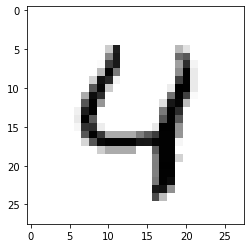

In [105]:
plt.imshow(xx_test[4].reshape(28,28),cmap='binary')
y_test[4]

# Load Single Image

9

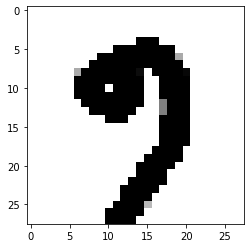

In [32]:
import cv2

path="./Images/9.png"

image=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
image=cv2.resize(image,(28,28))
plt.imshow(image,cmap='binary')
image=image.astype('float32')
image=image.reshape(-1,28,28,1)
image=image/255.0
model_cnn.predict(image).argmax()


In [75]:
from tensorflow import keras


In [76]:
model_load=keras.models.load_model('handwriting_98_03.h5')

In [77]:
model_load.predict(image).argmax()

3